In [2]:
import math, random, copy
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

import os

os.chdir('/home/matthias/TIPE_TSP/transparents/images')

In [55]:
def randCities(n, h=1, dx=0, dy=0): # nombre de villes, h = côté du carré, dx, dy : décalages en x,y
    return [(h*random.random()+dx, h*random.random()+dy) for i in range(n)]

def randChemin(n): # crée une permutation au hasard de S_n
    l = [i for i in range(n)]
    ll = []
    for i in range(n):
        j = random.randrange(0,len(l))
        ll.append(l[j])
        l.pop(j)
    return ll

def randChemin(n):
    return np.random.permutation(n)


def distance(ptA,ptB): # des listes/tuples de taille 2 pour deux coordonnées
    return math.sqrt( (ptA[0]-ptB[0])**2 + (ptA[1]-ptB[1])**2 )


# distanceMat prend une liste de villes et calcule la matrice des distances une bonne fois pour toutes
def distanceMat(villes): # une liste de villes est une liste de tuples ou une liste de listes de taille 2 (2 coordonnées)
    n = len(villes)
    dist = np.zeros((n,n), dtype='float')
    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = np.inf
            else:
                dist[i][j] = distance(villes[i],villes[j])
    return dist

In [56]:
def entangledToSeparated(l): # liste de coordonnées [[x1,y1],[x2,y2]] ou [(x1,y1),(x2,y2)] --> en [x1,x2],[y1,y2]
    x = []
    y = []
    for j in l:
        x.append(j[0])
        y.append(j[1])
    return x,y

def entangledToSeparated(l): # exactement la même fonction écrite différemment
    p = len(l)
    return [l[i][0] for i in range(p)], [l[i][1] for i in range(p)]

In [57]:
# Entrée: une lise de villes [(x1,y1), (x2,y2)]
# Sortie: * une liste d'entiers entre 0 et n-1 (où n est le nombre de villes), chacun une seule fois
#           l'ordre d'apparition des entiers représente l'ordre de visite des villes
#         * la longueur de la boucle du chemin créé

def nearestNeighbour(villes,M): # M = distanceMat(villes)
    n = len(villes)
    points = [i for i in range(1,n)]
    chemin = [0] # le chemin: la liste ordonnée des n°s de villes
    step = 0
    total_dist = 0
    while(len(points) > 0):
        nearest = points[0] # (i.e. le premier qui vient dans l'ensemble des points à affecter) (1 au début)
        d_min_tmp = M[step][nearest] # [distance minimale temporaire]
        for j in points:
            test_d = M[step][j] # [test_distance] distance testée
            if test_d < d_min_tmp:
                nearest = j
                d_min_tmp = test_d
        total_dist += d_min_tmp
        chemin.append(nearest)
        step = nearest
        points.remove(nearest)
    total_dist += M[0][step]
    return np.asarray(chemin),total_dist

In [58]:
def longueurTour(chemin,M): # en prenant une permutation d'entiers (l'ordre désigne la trajectoire/chemin) et la matrice des distances
    n = len(chemin)
    d = 0
    for i in range(n):
        d += M[chemin[i]][chemin[(i+1)%n]]
    return d # renvoie la longueur de la BOUCLE

def longueurTour2(chemin,villes): # en prenant les villes plutôt que la matrice
    M = distanceMat(villes)
    return longueurTour(chemin,M)

In [59]:
def drawMap(villes, title=None, filename='map.pdf'): # prend en entrée une liste de vcoordonnées (villes) et les place sur le plan
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.scatter(xp,yp, color='red')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title != None:
        plt.rc('text', usetex=True)
        ax.set_title(title)
    plt.savefig(filename, dpi=500,  bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')


def affichage(villes, start, title, dist, filename): # avec le départ
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.plot([xp[0],xp[-1]],[yp[0],yp[-1]], marker='o', color = 'blue', markersize = 4)
    ax.plot([xp[0],xp[1]],[yp[0],yp[1]], color='red', marker = 'o', markersize = 4) # on referme: on dessine le dernier segment parcouru en rouge
    ax.plot(xp[1:], yp[1:], marker='o', color = 'blue', markersize = 4) # le tour
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title !=None:
        plt.rc('text', usetex=True)
        ax.set_title(title+ ' d = ' + str(round(dist,5)))
    if filename != None:
        plt.savefig(filename, dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')


def affichage2(villes, title, dist, filename): # sans le départ
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, facecolor='#FFFFFF')
    ax.grid(True)
    xp,yp = entangledToSeparated(villes)
    ax.plot(xp, yp,'b', linestyle = '-', marker = 'o', markersize = 4, markerfacecolor='black')
    ax.plot([xp[0],xp[-1]],[yp[0],yp[-1]], 'b', linestyle = '-', marker = 'o', markersize = 4, markerfacecolor='black')
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    if title !=None:
        plt.rc('text', usetex=True)
        ax.set_title(title+ ' d = ' + str(round(dist,5)))
    if filename != None:
        plt.savefig(filename, dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

def drawPath(villes, chemin, title=None, dist=None, filename=None): # avec le départ
    villes_ordonnees = [villes[i] for i in chemin]
    affichage(villes_ordonnees, villes_ordonnees[0], title, dist, filename)


def drawPath2(villes, chemin, title=None, dist=None, filename=None): # sans le départ
    villes_ordonnees = [villes[i] for i in chemin]
    affichage2(villes_ordonnees, title, dist, filename)

In [60]:
def transposer(chemin,a,b):
    t = chemin[b]
    chemin[b] = chemin[a]
    chemin[a] = t

def echanger(t1,t2,indices,n): # on impose a < b < c < d
    a,b,c,d = indices          # toujours avec b = a+1 et d = c+1 dans notre utilisation
    t2[0:a+1] = t1[0:a+1]
    for i in range(c,b-1,-1):
        t2[c+b-i] = t1[i]
    if d != 0:
        t2[d:n] = t1[d:n]

def variation_distance_permutation(chemin,a,b,M,n): # on impose a < b (sinon ça fait n'importe quoi)
    if (a >= 1 and b <= n-2) or (a == 0 and b <= n-3) or (b == n-1 and a >= 2):
        if a < b-2:
            return M[chemin[a-1]][chemin[b]] + M[chemin[b]][chemin[(a+1)%n]] + M[chemin[b-1]][chemin[a]] + M[chemin[a]][chemin[(b+1)%n]] - M[chemin[a-1]][chemin[a]] - M[chemin[a]][chemin[(a+1)%n]] - M[chemin[b-1]][chemin[b]] - M[chemin[b]][chemin[(b+1)%n]]
        if a >= b-2:
            return M[chemin[a-1]][chemin[b]] + M[chemin[a]][chemin[(b+1)%n]] - M[chemin[a-1]][chemin[a]] - M[chemin[b]][chemin[(b+1)%n]]
    if a == 0 and b == n-1:
        return M[chemin[n-2]][chemin[0]] + M[chemin[n-1]][chemin[1]] - M[chemin[n-2]][chemin[n-1]] - M[chemin[0]][chemin[1]]
    if (a == 0 and b == n-2) or (a == 1 and b == n-1):
        return M[chemin[b-1]][chemin[a]] + M[chemin[b]][chemin[a+1]] - M[chemin[b-1]][chemin[b]] - M[chemin[a]][chemin[a+1]]

def variation_distance_croisement(chemin,t,M):
    a,b,c,d = t
    return M[chemin[a]][chemin[c]] + M[chemin[d]][chemin[b]] - M[chemin[a]][chemin[b]] - M[chemin[c]][chemin[d]]

def variation_distance_insertion(chemin,g,p,M,lc):
    # lc est la taille de la liste chemin, g est l'indice ajouté, p la position d'insertion doit être >= 0
    if p == 0 or p >= lc: # si on veut l'insérer en bout (tout début ou toute fin) de liste
        return M[chemin[0]][g] + M[chemin[-1]][g] - M[chemin[0]][chemin[-1]]
    else:
        return M[chemin[p-1]][g] + M[g][chemin[p]] - M[chemin[p-1]][chemin[p]]


def transposition_aleatoire(M,chemin,n,d,temp,etendue):
    points_a_echanger = random.sample(etendue,2)
    a = min(points_a_echanger)
    b = max(points_a_echanger)
    d_var = variation_distance_permutation(chemin,a,b,M,n)
    p = probaAcceptation(d_var, temp)
    if p > random.random():
        transposer(chemin,a,b)
        return d_var
    return 0

In [61]:
def TSP_SimulatedAnnealing(M,chemin,n,d,m,k):
    if m == 0:
        return chemin, d, None
    evolution_distances = []
    chemin = np.asarray(chemin) # ce n'est pas un pointeur: on transforme la liste en tableau
    evolution_distances.append(d)
    etendue = range(n)
    for temp in k*np.linspace(1,1/m,num = m):
        d += transposition_aleatoire(M,chemin,n,d,temp,etendue)
        evolution_distances.append(d)
    return chemin, d, evolution_distances


def probaAcceptation(dvar, temperature):
    if dvar < 0:
        return 1
    else:
        p = np.exp(- dvar / temperature)
        return p

In [62]:
def echanges_2_opt(M,chemin,dist,n):
    d = dist
    chemin = np.asarray(chemin) # ce n'est pas un pointeur: on transforme la liste en tableau
    t1 = np.copy(chemin)
    t2 = np.copy(chemin)
    i = 0
    while i <= n-3: # de 0 jusqu'à n-3
        j = i+2
        while j <= n-1:
            e,f = i,i+1
            g,h = j,(j+1)%n
            d_var = variation_distance_croisement(t1,(e,f,g,h),M)
            if round(d_var, 15) < 0:
                d += d_var
                # print('echanges_2_opt',l_var,i,j)
                # print(cheminbis)
                # on remplit t2 avec la meilleure solution:
                echanger(t1,t2,(e,f,g,h),n)
                # puis on échange
                gloubi = t1
                t1 = t2
                t2 = gloubi
                # enfin on recommence à 0
                i = 0
                j = 2
            else:
                j += 1
        i += 1
    return t1,d

In [63]:
def permutations_optimales_systematiques(M,chemin,dist,n):
    d = dist
    chemin = np.asarray(chemin) # ce n'est pas un pointeur: on transforme la liste en tableau
    modifs = 1
    while(modifs > 0):
        modifs = 0
        for i in range(n-1):
            for j in range(i+1,n):
                d_var = variation_distance_permutation(chemin,i,j,M,n)
                if d_var < 0:
                    modifs += 1
                    d += d_var
                    transposer(chemin,i,j)
    return chemin,d

In [64]:
def insertion(M,villes,n): # M = distanceMat(villes)
    d_totale = 0
    MD = np.copy(M)
    points = [i for i in range(n)]
    nb_villes_inserees = 0
    chemin = [] # c'est-à-dire les points insérés
    # Select the shortest edge, and make a subtour of it.
    index = np.argmin(M)
    i,j = index//n, index%n # on prend les deux villes qui correspondent à la plus petite distance de la matrice
    d_totale += 2*MD[i][j]
    chemin.append(i)
    chemin.append(j)
    nb_villes_inserees += 2
    points.remove(i)
    points.remove(j)
    # puis on met les distances entre les villes insérées entre ellesà l'infini pour ne pas choisir des villes déjà insérées
    MD[i][j] = np.inf
    MD[j][i] = np.inf
    while nb_villes_inserees < n:
        # Select a city not in the subtour, having the shortest distance to any one of the cities in the subtoor
        index = np.argmin(MD)
        # on fait en sorte que ce soit toujouts j qui soit à insérer et i qui est déjà insérée
        if index//n in chemin:
            i,j = index//n, index%n
        else:
            i,j = index%n, index//n
        # donc à partir de maintenant seul j nous intéresse...
        # on va créer un tableau qui donne la variation en distance (tjrs >= 0 d'après l'inégalité triangulaire) selon la position d'insertion
        variations = np.empty(nb_villes_inserees+1, dtype=float)
        for k in range(0,nb_villes_inserees+1):
            variations[k] = variation_distance_insertion(chemin, j, k, M, nb_villes_inserees)
        # Find an edge in the subtour such that the cost of inserting the selected city between the edge’s cities will be minimal.
        indice_insertion = np.argmin(variations)
        chemin.insert(indice_insertion, j)
        nb_villes_inserees += 1
        d_totale += variations[indice_insertion]
        points.remove(j)
        # puis on met les distances entre les villes insérées entre elles à l'infini
        for k in range(nb_villes_inserees):
                MD[j][chemin[k]] = np.inf
                MD[chemin[k]][j] = np.inf
    return np.asarray(chemin), d_totale

In [310]:
n = 100
# random.seed(10)
villes = randCities(n)
M = distanceMat(villes)


# print('Carte:')
# drawMap(villes)


# on génère un chemin complètement aléatoire
c_rd = randChemin(n)
d_rd = longueurTour(c_rd,M)
#print('Chemin aléatoire', d_rd)

#drawPath(villes,rdp)

0.004900693893432617 0.015577554702758789


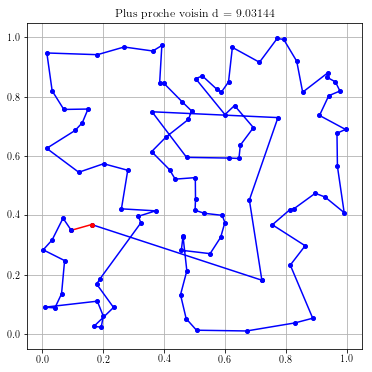

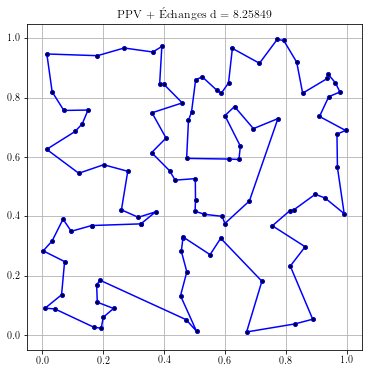

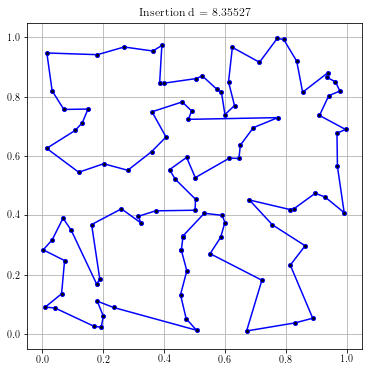

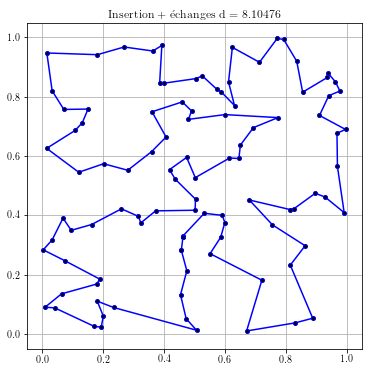

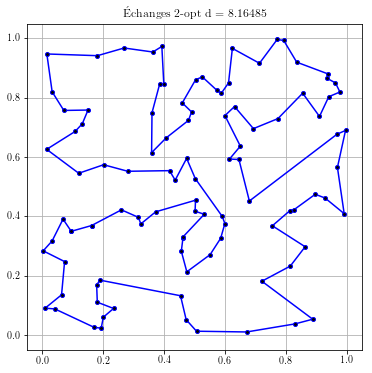

In [311]:
# =============================================================================
# MÉTHODE DU PLUS PROCHE VOISIN
tempsvoisin1 = time.time()
c_nn, d_nn = nearestNeighbour(villes,M)
tempsvoisin2 = time.time()

#print('Plus proche voisin', d_nn)
drawPath(villes,c_nn, 'Plus proche voisin', d_nn, 'ppv0.pdf')

# ========     + échanges
c_nn_ech, d_nn_ech = echanges_2_opt(M, c_nn, d_nn, n)

#print('PPV + Échanges', d_nn_ech)
drawPath2(villes,c_nn_ech, 'PPV + Échanges', d_nn_ech, 'ppv+echanges0.pdf')




# =============================================================================
#                ** MÉTHODE PAR INSERTION **

tempsinsertion1 = time.time()
c_ins, d_ins = insertion(M, villes, n)
tempsinsertion2 = time.time()
#print('Insertion', d_ins)
drawPath2(villes, c_ins, 'Insertion', d_ins, 'insertion0.pdf')

# ========     + échanges
c_ins_ech, d_ins_ech = echanges_2_opt(M, c_ins, d_ins, n)

#print('Insertion + échanges', d_ins_ech)
drawPath2(villes,c_ins_ech, 'Insertion + échanges', d_ins_ech, 'insertion+echanges0.pdf')


# =============================================================================
#                   ** MÉTHODE 2-OPT **
c_ech, d_ech = echanges_2_opt(M, c_rd, d_rd, n)
    
#print('Échanges 2-opt', d_ech)
drawPath2(villes,c_ech, 'Échanges 2-opt', d_ech, 'echanges2opt0.pdf')




print(tempsvoisin2 - tempsvoisin1, tempsinsertion2 - tempsinsertion1)

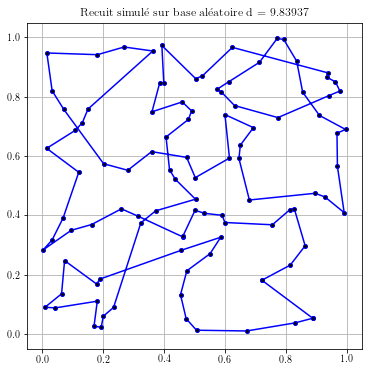

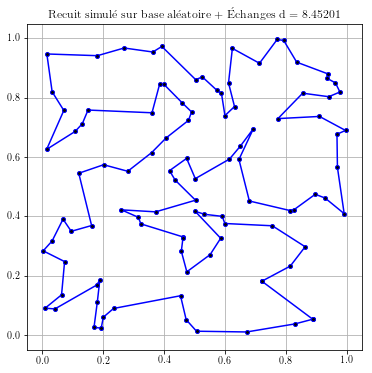

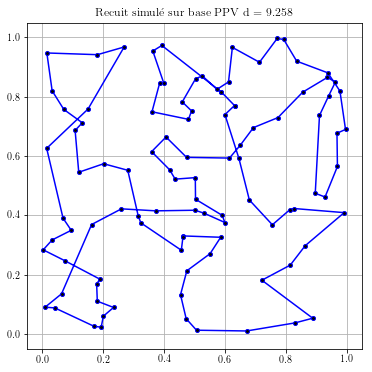

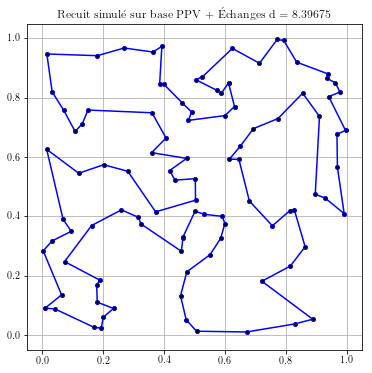

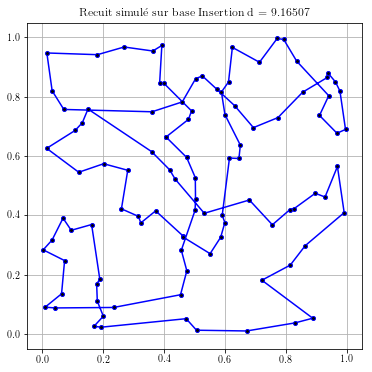

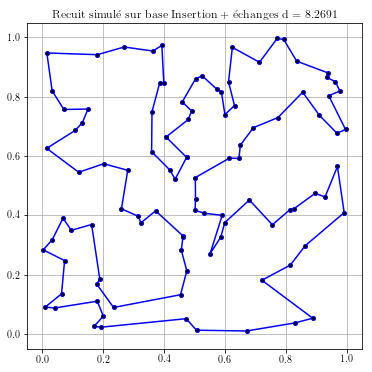

In [312]:
p = 1000000
k = 0.2 # k grand : plus souple; k petit: + rigide

# =============================================================================
#          ** RECUIT SIMULÉ SUR BASE ALÉATOIRE **

c_sa_rd,d_sa_rd,evol_sa_rd = TSP_SimulatedAnnealing(M,c_rd,n,d_rd,p,k)

#print('Méthode du recuit simulé sur base aléatoire', lrd)
drawPath2(villes,c_sa_rd, 'Recuit simulé sur base aléatoire', d_sa_rd, 'sa_rd.pdf')


# ========     + échanges
c_sa_rd_ech, d_sa_rd_ech = echanges_2_opt(M, c_sa_rd, d_sa_rd, n)

#print('PPV + Échanges', d_nn_ech)
drawPath2(villes,c_sa_rd_ech, 'Recuit simulé sur base aléatoire + Échanges', d_sa_rd_ech, 'sa_rd+echanges.pdf')



# =============================================================================
#          ** RECUIT SIMULÉ SUR BASE "PPV" / "NN" **
c_sa_nn, d_sa_nn, evol_sa_nn = TSP_SimulatedAnnealing(M,c_nn,n,d_nn,p,k)

#print('Recuit simulé sur base PPV', d_sa_nn)
drawPath2(villes,c_sa_nn, 'Recuit simulé sur base PPV', d_sa_nn, 'sa_ppv0.pdf')

    

# ========     + échanges
c_sa_nn_ech, d_sa_nn_ech = echanges_2_opt(M, c_sa_nn, d_sa_nn, n)

#print('Recuit simulé sur base PPV + Échanges', d_sa_nn_ech)
drawPath2(villes,c_sa_nn_ech, 'Recuit simulé sur base PPV + Échanges', d_sa_nn_ech, 'sa_ppv_ech.pdf')





# ==============================================================================
#      ** RECUIT SIMULÉ SUR BASE "Insertion" **
c_sa_ins, d_sa_ins, evol_sa_ins = TSP_SimulatedAnnealing(M,c_ins,n,d_ins,p,k)

#print('Recuit simulé sur base Insertion', d_sa_ins)
drawPath2(villes,c_sa_ins, 'Recuit simulé sur base Insertion', d_sa_ins, 'sa_ins.pdf')

# ========     + échanges
c_sa_ins_ech, d_sa_ins_ech = echanges_2_opt(M, c_sa_ins, d_sa_ins, n)

#print('Recuit simulé sur base Insertion + échanges', d_sa_ins_ech)
drawPath2(villes,c_sa_ins_ech, 'Recuit simulé sur base Insertion + échanges', d_sa_ins_ech, 'sa_ins+echanges.pdf')

In [ ]:
# tracer les graphes d'évolution de la distance
plt.plot(evol_sa_nn)
plt.suptitle('Recuit simulé sur base PPV')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
plt.savefig('evol_sa_rd.pdf')
plt.show()

plt.plot(evol_sa_nn)
plt.suptitle('Recuit simulé sur base PPV')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
plt.savefig('evol_sa_nn.pdf')
plt.show()


plt.plot(evol_sa_ins)
plt.suptitle('Recuit simulé sur base insertion')
plt.ylabel('Distance')
plt.xlabel('Étape')
plt.grid(True)
plt.savefig('evol_sa_ins.pdf')
plt.show()

In [52]:
def enregistre_heuristiques():
    np.save("plus_proche_voisin.npy", plus_proche_voisin)
    np.save("plus_proche_voisin_echanges.npy", plus_proche_voisin_echanges)
    np.save("par_insertion.npy", par_insertion)
    np.save("par_insertion_echanges.npy", par_insertion_echanges)
    np.save("deux_opt.npy", deux_opt)

In [35]:
plus_proche_voisin = np.load("plus_proche_voisin.npy")
plus_proche_voisin_echanges = np.load("plus_proche_voisin_echanges.npy")
par_insertion = np.load("par_insertion.npy")
par_insertion_echanges = np.load("par_insertion_echanges.npy")
deux_opt = np.load("deux_opt.npy")

In [93]:
e = 10

for n in range(190, 200):
    S_opt = 0
    S_nn = 0
    S_nn_ech = 0
    S_ins = 0
    S_ins_ech = 0
    
    for gloubi in range(e):
        cities = randCities(n)
        Mh = distanceMat(cities)
        
        c_rd = randChemin(n)
        d_rd = longueurTour(c_rd,Mh)
        
        c_ech, d_ech = echanges_2_opt(Mh, c_rd, d_rd, n)
        S_opt += d_ech

        c_nn, d_nn = nearestNeighbour(cities,Mh)
        S_nn  += d_nn

        c_nn_ech, d_nn_ech = echanges_2_opt(Mh, c_nn, d_nn, n)
        S_nn_ech += d_nn_ech

        c_ins, d_ins = insertion(Mh, cities, n)
        S_ins += d_ins

        c_ins_ech, d_ins_ech = echanges_2_opt(Mh, c_ins, d_ins, n)
        S_ins_ech += d_ins_ech
    
    plus_proche_voisin[n] = S_nn/e
    plus_proche_voisin_echanges[n] = S_nn_ech/e

    par_insertion[n] = S_ins/e
    par_insertion_echanges[n] = S_ins_ech/e
    
    deux_opt[n] = S_opt/e
    
    print('effectué', n)

effectué 190
effectué 191
effectué 192
effectué 193
effectué 194
effectué 195
effectué 196
effectué 197
effectué 198
effectué 199


In [489]:
N = 200 #121
#plus_proche_voisin = np.zeros(N, dtype = float)
#plus_proche_voisin_echanges = np.zeros(N, dtype = float)

#par_insertion = np.zeros(N, dtype = float)
#par_insertion_echanges = np.zeros(N, dtype = float)

#deux_opt = np.zeros(N, dtype = float)

In [113]:
# POUR DONNER LA COURBE DE MEILLEURE INTERPOLATION

from scipy import stats
X = [np.sqrt(i) for i in range(5,200)]
do = plus_proche_voisin[5:200]

slope, intercept, r_value, p_value, std_err = stats.linregress(X, do)

valeurs_trace = np.arange(0.0, 200, 0.05)


def approx(x):
    return intercept + slope * np.sqrt(x)


slope, intercept, r_value

(0.9266056781427984, 0.39960900427994517, 0.9985672713933971)

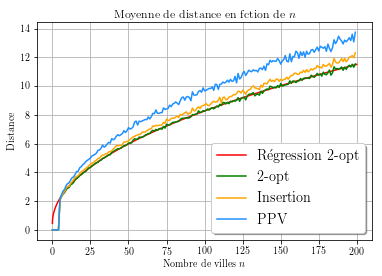

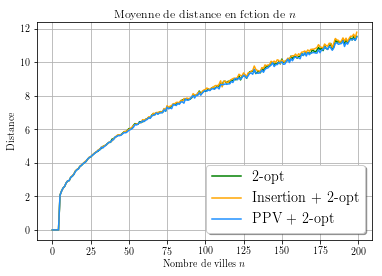

In [108]:
# pour visualiser les résultats des heuristiques
#fig, ax = plt.subplots()
plt.plot(valeurs_trace, approx(valeurs_trace), color = 'red', label = 'Régression 2-opt', alpha = 1)

plt.plot(deux_opt, color = 'green', label='2-opt')
plt.plot(par_insertion, color = 'orange', label='Insertion')
plt.plot(plus_proche_voisin, color = 'dodgerblue', label='PPV')
plt.rc('text', usetex=True)
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.title('Moyenne de distance en fction de $n$')
plt.ylabel('Distance')
plt.xlabel('Nombre de villes $n$')
#plt.xlim((0,200))
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.savefig('evol.pdf')
plt.show()

plt.clf()
#fig, ax = plt.subplots()
plt.plot(deux_opt, color = 'green', label='2-opt')
plt.plot(par_insertion_echanges, color = 'orange', label='Insertion + 2-opt')
plt.plot(plus_proche_voisin_echanges, color = 'dodgerblue', label='PPV + 2-opt')
plt.rc('text', usetex=True)
#legend((line1, line2, line3), ('label1', 'label2', 'label3'))
plt.title('Moyenne de distance en fction de $n$')
plt.ylabel('Distance')
plt.xlabel('Nombre de villes $n$')
legend = plt.legend(loc='lower right', shadow=True, fontsize='x-large')
plt.grid(True)
plt.savefig('evol_ech.pdf')
plt.show()


In [95]:
enregistre_heuristiques()

In [117]:
# À PARTIR D'ICI: TRAITEMENT DE LA SIMULATION DE RECUIT PARTAGÉE SUR 80 VILLES
simannrand1 = np.load("/home/matthias/TIPE_TSP/transparents/images/simulation de recuit partagés 80 random/recuit_base_aleatoire1.npy")
simannrand2 = np.load("/home/matthias/TIPE_TSP/transparents/images/simulation de recuit partagés 80 random/recuit_base_aleatoire2.npy")

In [30]:
simrand = simannrand1 + simannrand2

np.save('/home/matthias/TIPE_TSP/transparents/images/simulation de recuit partagés 80 random/recuit_base_aleatoire-merged.npy', simrand)

In [129]:
boulga = np.zeros((6, 38), dtype=float)
for I in enumerate([4, 8, 12, 16, 20, 24]):
    for J in enumerate([k for k in range(21, 62+1) if k%10 != 0]):
        boulga[I[0]][J[0]] = simrand[I[1]][J[1]]

#boulga

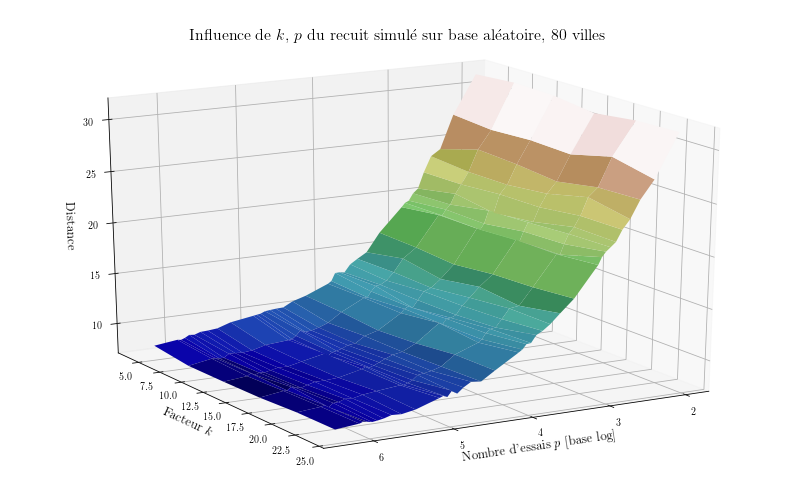

In [448]:
# surface

from matplotlib import cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D

z = boulga
x = [np.log10((k%10)*10**(k//10)) for k in range(21, 62+1) if k%10 != 0]
#x.reverse()
y = [4, 8, 12, 16, 20, 24]
x, y = np.meshgrid(x, y)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig00 = plt.figure(figsize=(14, 9))
ax00 = plt.subplot(projection='3d')
ax00.set_xlabel('Nombre d\'essais $p$ [base log]', fontsize=13)
ax00.set_ylabel('Facteur $k$', fontsize=13)
ax00.set_zlabel('Distance', fontsize=13)
ax00.set_title('Influence de $k$, $p$ du recuit simulé sur base aléatoire, 80 villes', fontsize=16)
#ax00.xaxis.set_scale('log')
ls = LightSource(azdeg=230, altdeg=60)
couleurs = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax00.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=couleurs, linewidth=0, antialiased=True, shade=False)
ax00.view_init(elev=20, azim=60)

plt.savefig('influence_de_k-80.pdf', dpi=500, bbox_inches='tight', facecolor='w', edgecolor='w',orientation='portrait')

In [2]:
# À PARTIR D'ICI: TRAITEMENT DE LA SIMULATION DE RECUIT PARTAGÉE SUR 100 VILLES


# Pour assombrir les couleurs
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

''' trouvé sur https://scipy-cookbook.readthedocs.io/items/Matplotlib_ColormapTransformations.html '''


def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

In [3]:
# À PARTIR D'ICI: TRAITEMENT DE LA SIMULATION DE RECUIT PARTAGÉE SUR 80 VILLES


recuit_simule_100_villes_final = np.load('recuit_simule_100villes.npy')

a = recuit_simule_100_villes_final[11:20]
b = recuit_simule_100_villes_final[21:30]
c = recuit_simule_100_villes_final[31:40]
d = recuit_simule_100_villes_final[41:50]
e = recuit_simule_100_villes_final[51:55]

data = np.concatenate((a,b,c,d,e))

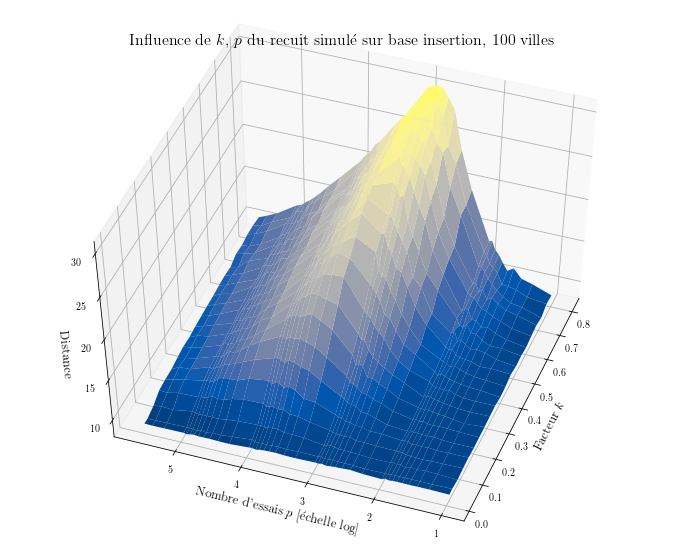

In [46]:
import matplotlib
from matplotlib import cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D


z = data
y = [np.log10((k%10)*10**(k//10)) for k in range(11, 55) if k%10 != 0]
x = [0.02, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.40, 0.44, 0.48, 0.52, 0.56, 0.60, 0.64, 0.68, 0.72, 0.76, 0.80]
x, y = np.meshgrid(x, y)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig00 = plt.figure(figsize=(12, 10))
#fig00.suptitle('This is the figure title', fontsize=12)
ax00 = plt.subplot(projection='3d')
ax00.set_ylabel('Nombre d\'essais $p$ [échelle log]', fontsize=13)
ax00.set_xlabel('Facteur $k$', fontsize=13)
ax00.set_zlabel('Distance', fontsize=13)
ax00.set_title('Influence de $k$, $p$ du recuit simulé sur base insertion, 100 villes', fontsize=16)
#ax00.xaxis.set_scale('log')


ls = LightSource(100, 100)
rgb = ls.shade(z, cmap=cm.cividis, vert_exag=0, blend_mode='soft') # magma, cividis, viridis
surf = ax00.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=True, shade=False)

ax00.view_init(elev=50, azim=200)

plt.savefig('influence_de_k_100_cividis.pdf', bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

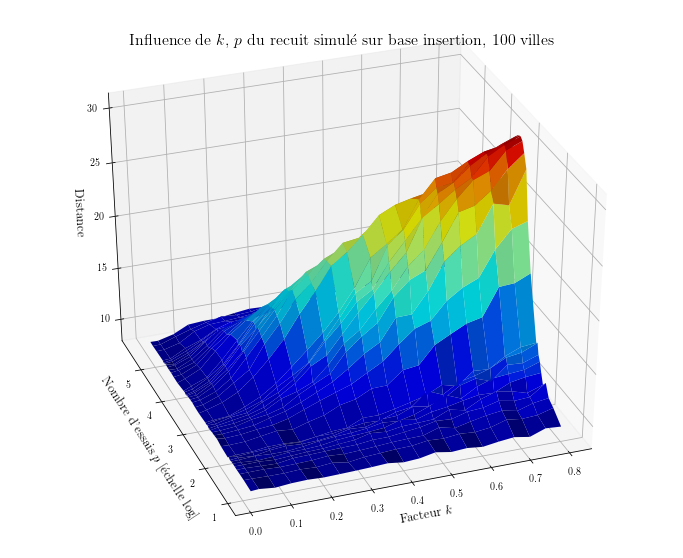

In [41]:
import matplotlib
from matplotlib import cm
from matplotlib.colors import LightSource
from mpl_toolkits.mplot3d import Axes3D

z = data
y = [np.log10((k%10)*10**(k//10)) for k in range(11, 55) if k%10 != 0]
x = [0.02, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.40, 0.44, 0.48, 0.52, 0.56, 0.60, 0.64, 0.68, 0.72, 0.76, 0.80]
x, y = np.meshgrid(x, y)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig00 = plt.figure(figsize=(12, 10))
ax00 = plt.subplot(projection='3d')
ax00.set_ylabel('Nombre d\'essais $p$ [échelle log]', fontsize=13)
ax00.set_xlabel('Facteur $k$', fontsize=13)
ax00.set_zlabel('Distance', fontsize=13)
ax00.set_title('Influence de $k$, $p$ du recuit simulé sur base insertion, 100 villes', fontsize=16)
#ax00.xaxis.set_scale('log')

dark_jet = cmap_map(lambda x: x*0.65, matplotlib.cm.jet)

ls = LightSource(100, 100)
rgb = ls.shade(z, cmap=dark_jet, vert_exag=0, blend_mode='soft') # magma, cividis, viridis # cm.gist_earth # cm.jet (couleurs de l'arc-en-ciel)
surf = ax00.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0, antialiased=True, shade=True)


ax00.view_init(elev=35, azim=250)

# l'option transparent = True fait planter XeLaTeX
plt.savefig('influence_de_k_100_earth.pdf',  bbox_inches='tight', dpi=500, facecolor='w', edgecolor='w',orientation='portrait')

In [88]:
n = 100
AA,BB,CC,DD,EE,FF,GG,HH,II,JJ = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
e = 20

for i in range(e):
    villes = randCities(n)
    M = distanceMat(villes)

    c_rd = randChemin(n)
    d_rd = longueurTour(c_rd,M)


    c_nn, d_nn = nearestNeighbour(villes,M)
    AA += d_nn
    
    c_nn_ech, d_nn_ech = echanges_2_opt(M, c_nn, d_nn, n)
    BB += d_nn_ech
    
    c_ins, d_ins = insertion(M, villes, n)
    CC += d_ins

    c_ins_ech, d_ins_ech = echanges_2_opt(M, c_ins, d_ins, n)
    DD += d_ins_ech

    

    p = 1000000
    k = 0.2

    # RECUIT SIMULÉ RANDOM
    c_sa_rd,d_sa_rd,evol_sa_rd = TSP_SimulatedAnnealing(M,c_rd,n,d_rd,p,k)
    EE += d_sa_rd


    c_sa_rd_ech, d_sa_rd_ech = echanges_2_opt(M, c_sa_rd, d_sa_rd, n)
    FF += d_sa_rd_ech

    p = 2000000
    k = 0.2
    
    # RECUIT SIMULÉ PLUS PROCHE VOISIN
    c_sa_nn, d_sa_nn, evol_sa_nn = TSP_SimulatedAnnealing(M,c_nn,n,d_nn,p,k)
    GG += d_sa_nn
    
    c_sa_nn_ech, d_sa_nn_ech = echanges_2_opt(M, c_sa_nn, d_sa_nn, n)
    HH += d_sa_nn_ech
    
    # RECUIT SIMULÉ INSERTION
    c_sa_ins, d_sa_ins, evol_sa_ins = TSP_SimulatedAnnealing(M,c_ins,n,d_ins,p,k)
    II += d_sa_ins
    
    c_sa_ins_ech, d_sa_ins_ech = echanges_2_opt(M, c_sa_ins, d_sa_ins, n)
    JJ += d_sa_ins_ech
    print('essai effectué', i)

essai effectué 0
essai effectué 1
essai effectué 2
essai effectué 3
essai effectué 4
essai effectué 5
essai effectué 6
essai effectué 7
essai effectué 8
essai effectué 9
essai effectué 10
essai effectué 11
essai effectué 12
essai effectué 13
essai effectué 14
essai effectué 15
essai effectué 16
essai effectué 17
essai effectué 18
essai effectué 19


In [95]:
tt = 1/e * np.array([AA,BB,CC,DD,EE,FF,GG,HH,II,JJ])
tt = np.load('/home/matthias/TIPE_TSP/transparents/images/resultats_synthese80bis.npy')

avec = (tt[0], tt[2], tt[4], tt[6], tt[8])
sans = (tt[1], tt[3], tt[5], tt[7], tt[9])

#np.save('/home/matthias/TIPE_TSP/transparents/images/resultats_synthese100bis.npy', tt)

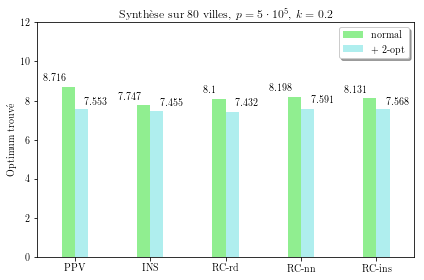

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


ind = 2*np.arange(len(avec))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, avec, width, label='normal', color='lightgreen') # mediumseagreen et darkturquoise # coral et khaki #plum et mediumslateblue
rects2 = ax.bar(ind + width/2, sans, width, label='+ 2-opt', color='paleturquoise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Optimum trouvé')
ax.set_title('Synthèse sur 80 villes, $p=5\cdot 10^5$, $k=0.2$')
ax.set_xticks(ind)
ax.set_ylim(0,12)
ax.set_xlim(-1,9)
ax.set_xticklabels(('PPV', 'INS', 'RC-rd', 'RC-nn', 'RC-ins'))
ax.legend(shadow=True)


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
plt.savefig('synthesis80bis.pdf')
plt.show()

In [ ]:
# À PARTIR D'ICI: LE MULTIPROCESSING QUI A PERMIS DE GÉNÉRER LES GRAPHES 3D (RECUIT SIMULÉ)

g = 15
n = 100

from multiprocessing import Pool

def calculs(X):
    p, k = X[0], X[1]
    S_sa_ins = 0

    for gloubi in range(g):
        cities = randCities(n)
        MG = distanceMat(cities)
        
        c_ins, d_ins = insertion(MG, cities, n)
        
        c_sa_ins, d_sa_ins, evol_sa_ins = TSP_SimulatedAnnealing(MG,c_ins,d_ins,p,k)
        S_sa_ins += d_sa_ins
        
    # print('exécuté', k, p)
    return S_sa_ins/g


def remplir(j): # j est un nombre de [0, 130] qui représente p selon le codage spécifié
    
    iterable = []
    liste_i = [56, 60, 64, 68, 72, 76, 80]
    for i in liste_i: # les valeurs de k*100
        k = i/100
        p = (j%10)*10**(j//10)
        iterable.append((p,k)) # d'abord le nombre d'essais, puis k

    if __name__ == '__main__':
        pool = Pool(processes=3) # ici le nombre de processus souhaité
        foo = pool.map_async(calculs, iterable)
        res = foo.get()
        pool.close()
        pool.join()
    
    for i in range(len(liste_i)): # les valeurs de k
        appoint56[j][i] = res[i]



for j in [52,53]:
    remplir(j)
    print('effectué', j)

In [ ]:
# À PARTIR D'ICI: LE MULTIPROCESSING QUI A PERMIS DE GÉNÉRER LES GRAPHES 3D (HEURSITIQUES)

def calculateur(n):
    S_opt = 0
    S_nn = 0
    S_nn_ech = 0
    S_ins = 0
    S_ins_ech = 0

    for iter in range(10):
        villes = randCities(n)
        M = distanceMat(villes)

        c_rd = randChemin(n)
        d_rd = longueurTour(c_rd,M)

        S_opt += ( echanges_2_opt(M, c_rd, d_rd, n) )[1]

        c_nn, d_nn = nearestNeighbour(villes,M)
        S_nn  += d_nn

        d_nn_ech = ( echanges_2_opt(M, c_nn, d_nn, n) )[1]
        S_nn_ech += d_nn_ech

        c_ins, d_ins = insertion(M, villes, n)
        S_ins += d_ins

        d_ins_ech = ( echanges_2_opt(M, c_ins, d_ins, n) )[1]
        S_ins_ech += d_ins_ech

        return S_nn/10, S_nn_ech/10, S_ins/10, S_ins_ech/10, S_opt/10


def calc(deb, fin):
    if __name__ == '__main__':
        pool = Pool(processes=3)
        foo = pool.map_async(calculateur, range(deb, fin+1))
        res = foo.get()
        for n in range(deb, fin+1):
            plus_proche_voisin[n] = res[n-deb][0]
            plus_proche_voisin_echanges[n] = res[n-deb][1]
            par_insertion[n] = res[n-deb][2]
            par_insertion_echanges[n] = res[n-deb][3]
            deux_opt[n] = res[n-deb][4]